# Social Network Analysis and Link Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import link_prediction
import collections
import random
#import nxviz as nv

In [2]:
data = pd.read_json('result.jl', lines=True) #with lines=True we specify that the objects are divided per line
data

,studio,title,genre
0,Sunrise Beyond,Gundam Build Divers Re:Rise,"[Action, Sci-Fi, Mecha]"
1,Sunrise Beyond,Mobile Suit Gundam: Iron-Blooded Orphans - Urð...,"[Action, Sci-Fi, Space, Drama, Mecha]"
2,Sunrise Beyond,Gundam Build Divers Re:Rise 2nd Season,"[Action, Sci-Fi, Mecha]"
3,Sunrise Beyond,King's Raid: Ishi wo Tsugumono-tachi,"[Action, Adventure, Magic, Fantasy]"
4,12 Diary Holders,Mirai Nikki,"[Action, Mystery, Psychological, Shounen, Supe..."
...,...,...,...
24064,Zexcs,Fune wo Amu: Yokoku,[Slice of Life]
24065,Zexcs,Hikari: Kariya wo Tsunagu Monogatari,[Sports]
24066,Zexcs,Nameko: Sekai no Tomodachi,"[Comedy, Kids]"
24067,Zexcs,Shadowverse (TV) Recap,"[Game, Fantasy]"


In [3]:
data['studio'] = data['studio'] + str('-studio')
data['title'] = data['title'] + str('-title')
data

,studio,title,genre
0,Sunrise Beyond -studio,Gundam Build Divers Re:Rise-title,"[Action, Sci-Fi, Mecha]"
1,Sunrise Beyond -studio,Mobile Suit Gundam: Iron-Blooded Orphans - Urð...,"[Action, Sci-Fi, Space, Drama, Mecha]"
2,Sunrise Beyond -studio,Gundam Build Divers Re:Rise 2nd Season-title,"[Action, Sci-Fi, Mecha]"
3,Sunrise Beyond -studio,King's Raid: Ishi wo Tsugumono-tachi-title,"[Action, Adventure, Magic, Fantasy]"
4,12 Diary Holders -studio,Mirai Nikki-title,"[Action, Mystery, Psychological, Shounen, Supe..."
...,...,...,...
24064,Zexcs -studio,Fune wo Amu: Yokoku-title,[Slice of Life]
24065,Zexcs -studio,Hikari: Kariya wo Tsunagu Monogatari-title,[Sports]
24066,Zexcs -studio,Nameko: Sekai no Tomodachi-title,"[Comedy, Kids]"
24067,Zexcs -studio,Shadowverse (TV) Recap-title,"[Game, Fantasy]"


In [5]:
df = data.drop(columns=['genre'], axis=1)
df

,studio,title
0,Sunrise Beyond -studio,Gundam Build Divers Re:Rise-title
1,Sunrise Beyond -studio,Mobile Suit Gundam: Iron-Blooded Orphans - Urð...
2,Sunrise Beyond -studio,Gundam Build Divers Re:Rise 2nd Season-title
3,Sunrise Beyond -studio,King's Raid: Ishi wo Tsugumono-tachi-title
4,12 Diary Holders -studio,Mirai Nikki-title
...,...,...
24064,Zexcs -studio,Fune wo Amu: Yokoku-title
24065,Zexcs -studio,Hikari: Kariya wo Tsunagu Monogatari-title
24066,Zexcs -studio,Nameko: Sekai no Tomodachi-title
24067,Zexcs -studio,Shadowverse (TV) Recap-title


In [5]:
studio_nodes = df[['studio']].drop_duplicates().reset_index(drop=True).rename(columns={'studio':'Label'})
studio_nodes['Category'] = 'studio'
studio_nodes

,Label,Category
0,Sunrise Beyond -studio,studio
1,12 Diary Holders -studio,studio
2,10Gauge -studio,studio
3,4Kids Entertainment -studio,studio
4,5pb. -studio,studio
...,...,...
1116,ZERO-A -studio,studio
1117,Zero-G -studio,studio
1118,Zero-G Room -studio,studio
1119,Zexcs -studio,studio


In [6]:
title_nodes = df[['title']].drop_duplicates().reset_index(drop=True).rename(columns={'title':'Label'})
title_nodes['Category'] = 'title'
title_nodes

,Label,Category
0,Gundam Build Divers Re:Rise-title,title
1,Mobile Suit Gundam: Iron-Blooded Orphans - Urð...,title
2,Gundam Build Divers Re:Rise 2nd Season-title,title
3,King's Raid: Ishi wo Tsugumono-tachi-title,title
4,Mirai Nikki-title,title
...,...,...
10765,Umi Monogatari: Kanon to Iku Amamikoshima-title,title
10766,Tokyo Juushouden-title,title
10767,Sister Princess: Re Pure Character's-title,title
10768,Fune wo Amu: Yokoku-title,title


In [7]:
nodes = pd.concat([studio_nodes, title_nodes], ignore_index=True)
nodes

,Label,Category
0,Sunrise Beyond -studio,studio
1,12 Diary Holders -studio,studio
2,10Gauge -studio,studio
3,4Kids Entertainment -studio,studio
4,5pb. -studio,studio
...,...,...
11886,Umi Monogatari: Kanon to Iku Amamikoshima-title,title
11887,Tokyo Juushouden-title,title
11888,Sister Princess: Re Pure Character's-title,title
11889,Fune wo Amu: Yokoku-title,title


In [8]:
nodes = pd.concat([studio_nodes, title_nodes], ignore_index=True)
nodes['index'] = nodes[['Label', 'Category']].agg('-'.join, axis=1)
nodes.set_index('index', inplace=True, drop=True)
nodes

,Label,Category
index,,
Sunrise Beyond -studio-studio,Sunrise Beyond -studio,studio
12 Diary Holders -studio-studio,12 Diary Holders -studio,studio
10Gauge -studio-studio,10Gauge -studio,studio
4Kids Entertainment -studio-studio,4Kids Entertainment -studio,studio
5pb. -studio-studio,5pb. -studio,studio
...,...,...
Umi Monogatari: Kanon to Iku Amamikoshima-title-title,Umi Monogatari: Kanon to Iku Amamikoshima-title,title
Tokyo Juushouden-title-title,Tokyo Juushouden-title,title
Sister Princess: Re Pure Character's-title-title,Sister Princess: Re Pure Character's-title,title


In [9]:
#To export data frames to csv to use it in Gephi (optional)
#df.to_csv(path_or_buf='anime_adjacency.csv', index=False, header=False)
#nodes.to_csv(path_or_buf='nodes.csv', index=True, index_label='Id', header=True)

# NetworkX Analysis

In [6]:
def connected_component_subgraphs(G):
    """
    Function to get the connected components of subgraphs.
    This function was deployed as NetworkX version 2.4 removed the connected_components_subgraphs feature.
    I have version 2.4 so I used this function. If you have a lower version, you may still have it.
    """
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [7]:
def largest_node(centrality):
    """
    Function to get the node with the largest value for centrality measures.
    """
    return list(reversed(sorted((value, node) for (node, value) in centrality.items())))[0][1]

In [8]:
studio = df['studio'].unique()
title = df['title'].unique()

In [9]:
print(len(studio))
print(len(title))

1121
10770


In [10]:
edges = df.values.tolist()

In [11]:
B = nx.Graph()

In [12]:
B.add_nodes_from(studio, bipartite=0)
B.add_nodes_from(title, bipartite=1)
B.add_edges_from(edges)

In [13]:
print(bipartite.is_bipartite_node_set(B, studio))
print(bipartite.is_bipartite_node_set(B, title))

True
True


In [15]:
# TO get max degree
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)
dmax = max(degree_sequence)
print(dmax)

487


In [ ]:
#plt.figure(figsize=(30,30))
#pos = nx.spring_layout(B)
#nx.draw(B, pos=pos)
#plt.show()

## Bipartite analysis

### Basic characteristics

In [20]:
print("Does the network is directed? ", B.is_directed())
print("Does the network is planar? ", nx.check_planarity(B, counterexample=False))
print("Does the network is bipartite? ", bipartite.is_bipartite(B))
print("Does the network is connected? ", nx.is_connected(B))
print("Number of connected components:", nx.number_connected_components(B))
print("Is weighted? ", nx.is_weighted(B))

Does the network is directed?  False
Does the network is planar?  (False, None)
Does the network is bipartite?  True
Does the network is connected?  False
Number of connected components: 165
Is weighted?  False


In [27]:
# Statistics Functions for two-mode not connected network

print(nx.info(B))
print("Network size:", B.size()) # Return the number of edges
print('Network density (studio partition): ', bipartite.density(B, studio))
print('Network density (title partition): ', bipartite.density(B, title))
print("Average clustering coefficient:", bipartite.average_clustering(B, studio))
print("Average clustering coefficient:", bipartite.average_clustering(B, title))
print("Average clustering coefficient:", bipartite.average_clustering(B))

Name: 
Type: Graph
Number of nodes: 11891
Number of edges: 24069
Average degree:   4.0483
Network size: 24069
Network density (studio partition):  0.0019935940602178216
Network density (title partition):  0.0019935940602178216
Average clustering coefficient: 0.07118483113889361
Average clustering coefficient: 0.4224887440464933
Average clustering coefficient: 0.3893702774440719


In [25]:
# Analysis for each component
for C in connected_component_subgraphs(B):
    print(nx.info(C))
    print("Network size:", C.size()) # Return the number of edges
    print('Network density (studio partition): ', bipartite.density(C, studio))
    print('Network density (title partition): ', bipartite.density(C, title))
    print("Average shortest path length:", nx.average_shortest_path_length(C))
    #print("Average clustering coefficient:", bipartite.average_clustering(C, studio))
    #print("Average clustering coefficient:", bipartite.average_clustering(C, title))
    print("Average clustering coefficient:", bipartite.average_clustering(C))
    E = nx.eccentricity(C)
    print("Diameter:", nx.diameter(C, E))
    print("Radius:", nx.radius(C, E))
    print("Periphery:\n", nx.periphery(C, E))
    print("Center:\n", nx.center(C, E))
    print("Eccentricity: ", E)
    print("\n")
    print("Maximum matching: ", bipartite.maximum_matching(C))
    print("\n");print("\n")

Name: 
Type: Graph
Number of nodes: 11296
Number of edges: 23636
Average degree:   4.1848
Network size: 23636
Network density (studio partition):  0.0020722108857702077
Network density (title partition):  0.004172271236465184
Average clustering coefficient: 0.38164283930663856
Diameter: 16
Radius: 9
Periphery:
 ['Velvet Underworld: Fragment Person-title', 'Mei Chuxi de Yinyangshi Yijia-title', 'Mei Chuxi de Yinyangshi Yijia 2-title', 'Gdleen-title']
Center:
 ['81 Produce -studio', 'Artland -studio', 'Bandai Namco Arts -studio', 'Bandai Visual -studio', 'bilibili -studio', 'BS Fuji -studio', 'BS11 -studio', 'Bushiroad -studio', 'Crunchyroll SC Anime Fund -studio', 'Crunchyroll -studio', 'David Production -studio', 'DAX Production -studio', 'Digital Frontier -studio', 'DLE -studio', 'Docomo Anime Store -studio', 'Doga Kobo -studio', 'Evil Line Records -studio', 'Fields -studio', 'flying DOG -studio', 'Funimation -studio', 'Genco -studio', 'Gonzo -studio', 'Good Smile Company -studio', 'J

In [20]:
print("Closeness centrality: ", largest_node(bipartite.closeness_centrality(B, studio)))
print("Degree centrality: ", largest_node(bipartite.degree_centrality(B, studio)))
print("Betweenness centrality: ", largest_node(bipartite.betweenness_centrality(B, studio)))

Closeness centrality:  Yumearu Ugoku Ehon-title
Degree centrality:  Toei Animation -studio
Betweenness centrality:  Funimation -studio


In [28]:
#To compare density vs sparsity in the network
Lmax = len(studio) * len(title)
density_manual = B.number_of_edges() / Lmax
print("Lmax: ", Lmax)
print("Density: ", density_manual)

Lmax:  12073170
Density:  0.0019935940602178216


Degree Frequency
Length: 488
Highest Frequency: 5457


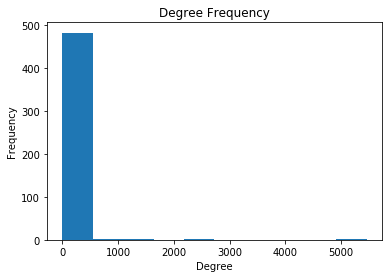

In [38]:
DegFreq = nx.degree_histogram(B)
print ('Degree Frequency\nLength: ' + str(len(DegFreq)) + '\n' + 'Highest Frequency: ' + str(DegFreq[1]))

plt.hist(DegFreq)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Frequency')
plt.show()

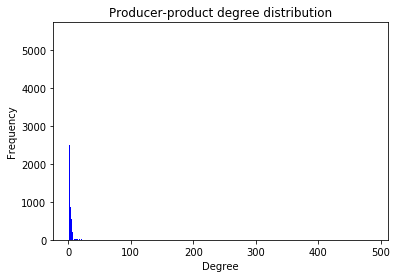

In [16]:
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)  # degree sequence

# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color = "b")

plt.title("Producer-product degree distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

# Save figure
#plt.savefig('degree-distribution_bipartite_plant-pollinator.png', format='png', dpi=400, bbox_inches="tight")

plt.show()

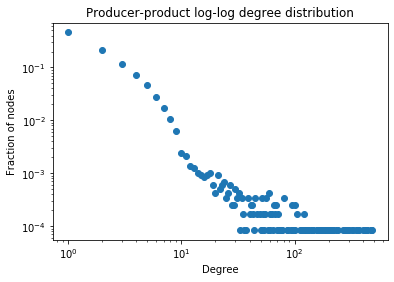

In [18]:
degrees = dict(nx.degree(B))
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(B)) for i in degree_values]
fig, ax = plt.subplots()
ax.plot(degree_values, histogram, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Producer-product log-log degree distribution")
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
# Save figure
#plt.savefig('degree_distribution_producer-product.png', format='png', dpi=400, bbox_inches="tight")
plt.show()

### Link prediction

In [17]:
# Take a random sample of edges
edge_subset = random.sample(B.edges(), int(0.25 * B.number_of_edges())) #25% sample

In [18]:
# Remove some edges from the original graph
B_train = B.copy()
B_train.remove_edges_from(edge_subset)

In [19]:
B_train_df = nx.to_pandas_edgelist(B_train) #convert to a adjacency list or edgelist in a data frame to use it in Gephi

In [52]:
#B_train_df.to_csv(path_or_buf='two-mode train graph.csv', index=False, header=False) 

In [20]:
print("Total edges in graph: ", B.number_of_edges())
print("Total edges in subsample: ", len(edge_subset))

Total edges in graph:  24069
Total edges in subsample:  6017


In [21]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((B.number_of_edges() - edge_subset_size)))

Deleted :  6017
Remaining :  18052


## One-mode projection

In [14]:
# Create co-affiliation network
G = bipartite.projected_graph(B, studio)

In [ ]:
# Create figure
#plt.figure(figsize=(30,30))
# Calculate layout
#pos = nx.spring_layout(G, k=0.2)
#pos = nx.kamada_kawai_layout(G)
# Draw edges, nodes, and labels
#nx.draw_networkx_edges(G, pos, width=3, alpha=0.3)
#nx.draw_networkx_nodes(G, pos, node_color="#13c64f", node_size=100)
#nx.draw_networkx_labels(G, pos)
# Save figure
#plt.savefig('unipartite_pollinator-pollinator.png', format='png', dpi=400, bbox_inches="tight")
#plt.show()

In [74]:
print("Does the network is directed? ", G.is_directed())

print("Does the network is planar? ", nx.check_planarity(G))
print("Does the network is bipartite? ", bipartite.is_bipartite(G))

print("Does the network is connected? ", nx.is_connected(G))

print("Number of connected components:", nx.number_connected_components(G))
print("Is weighted? ", nx.is_weighted(G))

Does the network is directed?  False
Does the network is planar?  (False, None)
Does the network is bipartite?  False
Does the network is connected?  False
Number of connected components: 165
Is weighted?  False


In [82]:
print(nx.info(G))
print("Network size:", G.size()) # Return the number of edges
print('Network density: ', nx.density(G))
#print("Average shortest path length:", nx.average_shortest_path_length(G)) #for connected graph
print("Average clustering coefficient:", nx.average_clustering(G)) 
#E = nx.eccentricity(G) #for connected graph
#print("Diameter:", nx.diameter(G, E))
#print("Radius:", nx.radius(G, E))
#print("Periphery:\n", nx.periphery(G, E))
#print("Center:\n", nx.center(G, E))
#print("Eccentricity: ", E)
print("\n")

Name: 
Type: Graph
Number of nodes: 1121
Number of edges: 11637
Average degree:  20.7618
Network size: 11637
Network density:  0.018537339110488084
Average clustering coefficient: 0.48297442778993344




In [ ]:
for C in connected_component_subgraphs(G):
    print(nx.info(C))
    print("Network size:", C.size()) # Return the number of edges
    print('Network density: ', nx.density(C))
    print("Average shortest path length:", nx.average_shortest_path_length(C)) #for connected graph
    print("Average clustering coefficient:", nx.average_clustering(C)) 
    E = nx.eccentricity(C) #for connected graph
    print("Diameter:", nx.diameter(C, E))
    print("Radius:", nx.radius(C, E))
    print("Periphery:\n", nx.periphery(C, E))
    print("Center:\n", nx.center(C, E))
    print("Eccentricity: ", E)
    print("\n")

In [ ]:
for C in connected_component_subgraphs(G):
    print("Node connectivity: ", nx.node_connectivity(C)) #Node connectivity is equal to the minimum number of nodes that must be removed to disconnect G or render it trivial.
    print("Minimum node cut: ", nx.minimum_node_cut(C))
    print("Edge connectivity: ", nx.edge_connectivity(C))
    print("Minimum edge cut: ", nx.minimum_edge_cut(C))

In [87]:
degree_centrality = nx.degree_centrality(G)
for n in G.nodes():
    G.nodes[n]['centrality'] = degree_centrality[n]

In [89]:
#print(degree_centrality)

Degree Frequency
Length: 301
Highest Frequency: 100


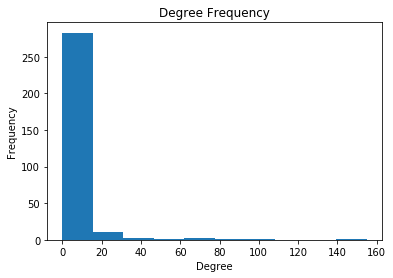

In [90]:
DegFreq = nx.degree_histogram(G)
print ('Degree Frequency\nLength: ' + str(len(DegFreq)) + '\n' + 'Highest Frequency: ' + str(DegFreq[1]))

plt.hist(DegFreq)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Frequency')
plt.show()

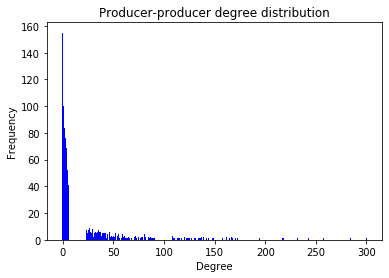

In [91]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color = "b")

plt.title("Producer-producer degree distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

# Save figure
#plt.savefig('degree-distribution_bipartite_plant-pollinator.png', format='png', dpi=400, bbox_inches="tight")

plt.show()

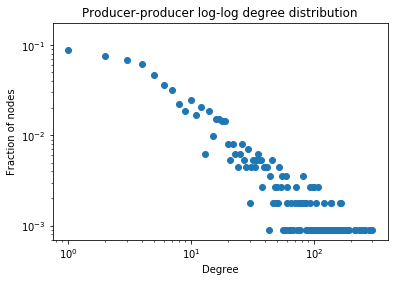

In [20]:
degrees = dict(nx.degree(G))
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
fig, ax = plt.subplots()
ax.plot(degree_values, histogram, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Producer-producer log-log degree distribution")
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
# Save figure
#plt.savefig('degree_distribution-producer-producer.png', format='png', dpi=400, bbox_inches="tight")
plt.show()

### Centrality metrics

In [95]:
# Centrality Functions

C = largest_node(nx.degree_centrality(G))
C_c = largest_node(nx.closeness_centrality(G))
C_b = largest_node(nx.betweenness_centrality(G))
C_b_edge = largest_node(nx.edge_betweenness_centrality(G))
C_eigen = largest_node(nx.eigenvector_centrality_numpy(G))
C_katz = largest_node(nx.katz_centrality_numpy(G, alpha = 0.25, beta = 0.2))
C_pagerank = nx.pagerank(G, alpha=0.85)
C_pagerank = list(reversed(sorted((value, node) for (node, value) in C_pagerank.items())))[0][1]

Best node candidate on degree centrality: Funimation -studio
Best node candidate on closenness centrality: Funimation -studio
Best node candidate on betweeness centrality: Funimation -studio
Best edge candidate on betweeness centrality: ('bilibili -studio', 'Tencent Penguin Pictures -studio')
Best node candidate on eigenvector centrality: Funimation -studio


In [98]:
print("Best node candidate on degree centrality:", C) #important indicator for group performance
print("Best node candidate on closenness centrality:", C_c)
print("Best node candidate on betweeness centrality:", C_b) #view as a leader #important indicator for group performance
print("Best edge candidate on betweeness centrality:", C_b_edge) 
print("Best node candidate on eigenvector centrality:", C_eigen)
print("Best node candidate on katz_centrality:", C_katz)
print("Page rank of the graph:", C_pagerank)

Best node candidate on degree centrality: Funimation -studio
Best node candidate on closenness centrality: Funimation -studio
Best node candidate on betweeness centrality: Funimation -studio
Best edge candidate on betweeness centrality: ('bilibili -studio', 'Tencent Penguin Pictures -studio')
Best node candidate on eigenvector centrality: Funimation -studio
Best node candidate on katz_centrality: Takeshobo -studio
Page rank of the graph: Funimation -studio


## Link prediction

In [15]:
# Take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges())) #25% sample

In [16]:
# Remove some edges from the original graph
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

In [26]:
G_train_df = nx.to_pandas_edgelist(G_train) #convert to a adjacency list or edgelist in a data frame to use it in Gephi

In [58]:
#G_train_df.to_csv(path_or_buf='one-mode train graph.csv', index=False, header=False) 

In [17]:
print("Total edges in graph: ", G.number_of_edges())
print("Total edges in subsample: ", len(edge_subset))

Total edges in graph:  11637
Total edges in subsample:  2909


In [18]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((G.number_of_edges() - edge_subset_size)))

Deleted :  2909
Remaining :  8728


### Similarity scores

In [19]:
#Jaccard coefficient
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [20]:
#Adamic-Adar index
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [21]:
#Preferential attachment
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [27]:
#Resource allocation
prediction_rea = list(nx.resource_allocation_index(G_train))
score_rea, label_rea = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_rea])

In [22]:
from sklearn.metrics import roc_curve, auc

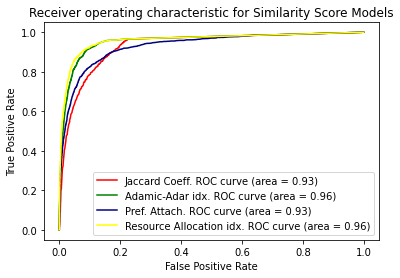

In [39]:
#Jaccard roc-auc
fpr_jaccard,tpr_jaccard,ths_jaccard = roc_curve(label_jaccard,score_jaccard)
auc_sc_jaccard = auc(fpr_jaccard, tpr_jaccard)

fpr_adamic,tpr_adamic,ths_adamic = roc_curve(label_adamic,score_adamic)
auc_sc_adamic = auc(fpr_adamic, tpr_adamic)

#Preferential attachment roc-auc
fpr_pref,tpr_pref,ths_pref = roc_curve(label_pref,score_pref)
auc_sc_pref = auc(fpr_pref, tpr_pref)

#Preferential attachment roc-auc
fpr_rea,tpr_rea,ths_rea = roc_curve(label_rea,score_rea)
auc_sc_rea = auc(fpr_rea, tpr_rea)

fig, ax = plt.subplots()
ax.plot(fpr_jaccard, tpr_jaccard, color='red',label='Jaccard Coeff. ROC curve (area = %0.2f)' % auc_sc_jaccard)
ax.plot(fpr_adamic, tpr_adamic, color='green',label='Adamic-Adar idx. ROC curve (area = %0.2f)' % auc_sc_adamic)
ax.plot(fpr_pref, tpr_pref, color='navy',label='Pref. Attach. ROC curve (area = %0.2f)' % auc_sc_pref)
ax.plot(fpr_rea, tpr_rea, color='yellow',label='Resource Allocation idx. ROC curve (area = %0.2f)' % auc_sc_rea)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Similarity Score Models')
plt.legend()
plt.savefig('roc-auc similarity one-mode network.png', format='png', dpi=400, bbox_inches="tight")
plt.show()